In [1]:
import numpy as np
from typing import List, Dict
from collections import namedtuple

import networkx as nx
import pylab

In [2]:
from os import path
import sys
sys.path.append(path.abspath('..'))

# from tensor_graph import TensorGraph
# from utils import Graph, Edge

In [112]:
import matplotlib.pyplot as plt


def draw_graph_distribution(my_graph, distr, action_edge_id):
    plt.figure(figsize=(10, 6))
    nx_graph = nx.Graph()
    for edge, prob in zip(my_graph.edges, distr):
        nx_graph.add_edges_from([(edge.u, edge.v)], probability=round(prob, 2), dim=edge.dim, id=edge.id)
    
    probabilities = nx.get_edge_attributes(nx_graph, 'probability')
    prob_values = probabilities.values() 
    dims = nx.get_edge_attributes(nx_graph, 'dim')
    dims_values = dims.values()
    
    pos = nx.spring_layout(nx_graph)
    
    nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=probabilities, label_pos=0.5, font_size=13)
    nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=dims, label_pos=0.2, font_size=9)
    
    styles = ['-' for _ in range(nx_graph.number_of_edges())]
    styles[action_edge_id] = '--'
    
    nx.draw(nx_graph, pos, node_color='y', width=list(dims_values), 
            with_labels=True, style=styles, edge_color=prob_values, edge_cmap=plt.cm.get_cmap('Oranges'))
    pylab.show()
    
    
def draw_agent_trajectory(trajectory):
    for graph, distr, action in trajectory.observations[:-1], trajectory.distributions, trajectory.chosen_actions:
        draw_graph_distribution(graph, distr, action)

[2 7 3 1 6 5 4]


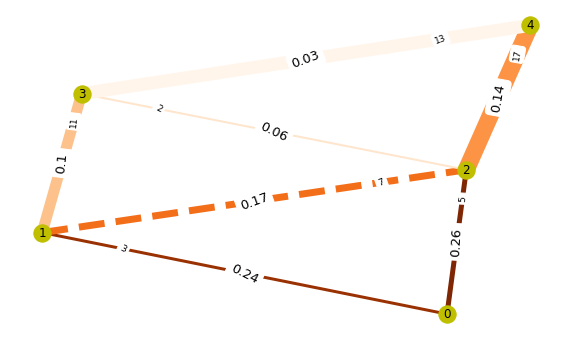

In [118]:
Graph = namedtuple('Graph', ['nodes_count', 'edges'])
Edge = namedtuple('Edge', ['id', 'u', 'v', 'dim'])


nodes_count = 5
graph = Graph(5, [Edge(0, 0, 1, 3), Edge(1, 0, 2, 5), Edge(2, 2, 1, 7), Edge(3, 3, 2, 2), 
                  Edge(4, 1, 3, 11), Edge(5, 3, 4, 13), Edge(6, 2, 4, 17)])
distribution = np.random.rand(7)
distribution = distribution / np.sum(distribution)
widths = np.arange(7) + 1
np.random.shuffle(widths)
print(widths)
draw(graph, distribution, 2)

In [115]:
print(distribution)

[0.1297956  0.05122047 0.22587789 0.24181044 0.03611101 0.20557058
 0.109614  ]


In [83]:
import matplotlib.cm
print(matplotlib.cm.cmap_d.keys())

dict_keys(['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'Greens_r', 'Greys_r', 'OrRd_r', 'Oranges_r', 'PRGn_r', 'PiYG_r', 'PuBu_r', 'PuBuGn_r', 'PuOr_r', 'PuRd_r', 'Purples_r', 'RdBu_r', 'RdGy_r', 'RdPu_r', 'RdYlBu_r', 'RdYlGn_r', 'Reds_r', 'Spectral